In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_path = '/content/gdrive/My Drive/Colab Notebooks/SMAI/Assignment 1/Datasets/q2/train.csv'
test_path = '/content/gdrive/My Drive/Colab Notebooks/SMAI/Assignment 1/Datasets/q2/test.csv'
test_labels_path = '/content/gdrive/My Drive/Colab Notebooks/SMAI/Assignment 1/Datasets/q2/test_labels.csv'

In [0]:
import pandas as pd
import numpy as np
from pprint import pprint

In [0]:
df_train = pd.read_csv(train_path, header=None)
print(df_train.shape)
df_train.head()

(4496, 23)


0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22
0  e  k  s  n  f  n  a  c  b  y  e  ?  s  s  o  o  p  n  o  p  b  c  l
1  e  k  s  g  f  n  f  w  b  p  e  ?  s  s  w  w  p  w  t  p  w  s  g
2  e  b  s  g  f  n  f  w  b  w  e  ?  s  s  w  w  p  w  t  p  w  s  g
3  e  s  f  g  f  n  f  c  n  n  e  e  s  s  w  w  p  w  o  p  n  v  u
4  e  f  f  g  f  n  f  w  b  p  t  e  s  f  w  w  p  w  o  e  n  a  g

### KNN Classifier code

In [0]:
class KNNClassifier(object):
    def __init__(self, k=7, p=2):
        self.df_train = self.df_test = self.shape = None
        self.k = k
        self.p = p

    def train(self, train_path = ''):
        try:
            self.df_train = pd.read_csv(train_path, header=None)
        except:
            print('Invalid train data path')
            exit(-1)

    def preprocess(self):
        self.train_shape = self.df_train.shape[:]
        self.test_shape = self.df_test.shape[:]

        # print(self.train_shape, self.test_shape)

        self.df_train = self.df_train.replace('?', self.df_train[11].mode()[0])

        self.df_train_y = self.df_train[0].values[:]
        self.df_train = self.df_train.drop(0, axis =1 )
        self.df_train = self.df_train.rename(columns=dict(zip(list(range(1,23)),list(range(0,22)))))

        self.df_train = self.df_train.append(self.df_test, ignore_index=True)

        categorical_ind = self.df_train.dtypes == 'object'

        
        categorical_cols = self.df_train.columns[categorical_ind].tolist()

        '''remove label variable'''

        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()

        self.df_train[categorical_cols] = self.df_train[categorical_cols].apply(lambda col: le.fit_transform(col))

        self.df_train_x = self.df_train[categorical_cols].values[:self.train_shape[0]]
        self.df_test_x = self.df_train[categorical_cols].values[self.train_shape[0]:]

        del self.df_train
        
        # print(self.df_train_x.shape, self.df_train_y.shape, 'shape\n')
        # print(self.df_test_x.shape)
        # print(self.df_test_x)
        
        return        
        

    def lpnorm(self, test_instance):
        '''
        Lp norm calculates lp distance where p > 0
        '''
        return np.abs(np.float_power((self.df_train_x - test_instance), self.p)).sum(axis=1)

    def get_k_nearest_neighbours(self, test_instance):
        '''
        Function Returns the nearest neighest of the set avaliable based on the k value
        '''
        '''argpartition returns the ind of nearest elements, bincount forms histogram till largest value and argmax returns the highest peat in histogram'''
        from scipy import stats
        # print(stats.mode(self.df_train_y[np.argsort(np.array(self.lpnorm(test_instance)))[:self.k]][:,0])[0][0]) 
        # input()
        # print()
        # return stats.mode(self.df_train_y[np.argsort(np.array(self.lpnorm(test_instance)))[:self.k]][:,0])[0][0]
        return stats.mode(self.df_train_y[np.argsort(np.array(self.lpnorm(test_instance)))[:self.k]])[0][0]

    def predict(self, test_path=''):
        try:
            self.df_test = pd.read_csv(test_path, header=None)
        except:
            print('Invalid test Data path')
            exit(-1)
        self.preprocess()
        # return
        # df_test_x = self.df_test[:].values
        del self.df_test
        predicted_result = []
        for test_instance in self.df_test_x:
            predicted_result.append(self.get_k_nearest_neighbours(test_instance))
        return predicted_result

###For different values of k in neighbours

K value 3
 precision	|	                 1.0	|	                 1.0
    recall	|	                 1.0	|	                 1.0
    fscore	|	                 1.0	|	                 1.0
   support	|	                 505	|	                 495
Accuracy  1.0
Confusion Matrix


[[505   0]
 [  0 495]]


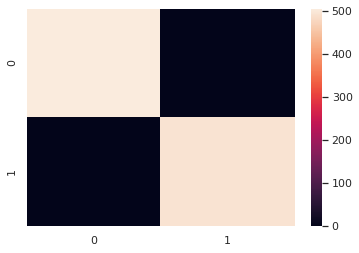




K value 5
 precision	|	                 1.0	|	                 1.0
    recall	|	                 1.0	|	                 1.0
    fscore	|	                 1.0	|	                 1.0
   support	|	                 505	|	                 495
Accuracy  1.0
Confusion Matrix


[[505   0]
 [  0 495]]


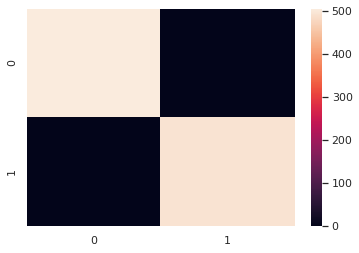




K value 7
 precision	|	                 1.0	|	                 1.0
    recall	|	                 1.0	|	                 1.0
    fscore	|	                 1.0	|	                 1.0
   support	|	                 505	|	                 495
Accuracy  1.0
Confusion Matrix


[[505   0]
 [  0 495]]


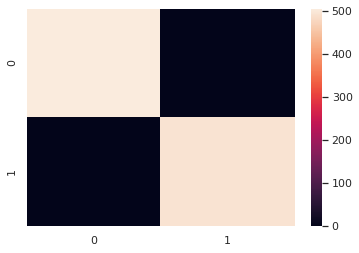

In [0]:
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, confusion_matrix
'''
Different values of k
'''
k_metrics = []
for k in [3,5,7]:
    knn_classifier = KNNClassifier()
    knn_classifier.train(train_path)
    predictions = knn_classifier.predict(test_path)
    test_labels = list()
    with open(test_labels_path) as f:
        for line in f:
            test_labels.append(line.strip())

    print('K value', k)
    from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
    precision, recall, fscore, support = score(test_labels, predictions)
    k_metrics.append(list([precision, recall, fscore, support]))
    print('precision'.rjust(10),*[str(i).rjust(20) for i in  list(precision)], sep='\t|\t')
    print('recall'.rjust(10),*[str(i).rjust(20) for i in  list(recall)], sep='\t|\t')
    print('fscore'.rjust(10),*[str(i).rjust(20) for i in  list(fscore)], sep='\t|\t')
    print('support'.rjust(10),*[str(i).rjust(20) for i in  list(support)], sep = '\t|\t')
    print('Accuracy ', accuracy_score(test_labels, predictions))

    print('Confusion Matrix\n\n')
    
    from sklearn.metrics import confusion_matrix
    from matplotlib import pyplot as plt
    %matplotlib inline
    print(confusion_matrix(test_labels, predictions))

    import seaborn as sns; sns.set()
    ax = sns.heatmap(confusion_matrix(test_labels, predictions))
    plt.show()
    print('\n\n')


###For different Values of p in lp-space

K value 7
 precision	|	                 1.0	|	                 1.0
    recall	|	                 1.0	|	                 1.0
    fscore	|	                 1.0	|	                 1.0
   support	|	                 505	|	                 495
Accuracy  1.0
Confusion Matrix


[[505   0]
 [  0 495]]


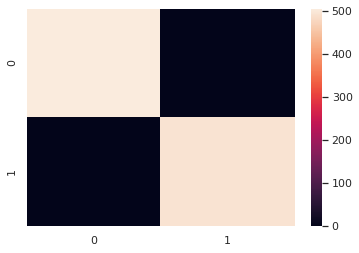




K value 7
 precision	|	                 1.0	|	                 1.0
    recall	|	                 1.0	|	                 1.0
    fscore	|	                 1.0	|	                 1.0
   support	|	                 505	|	                 495
Accuracy  1.0
Confusion Matrix


[[505   0]
 [  0 495]]


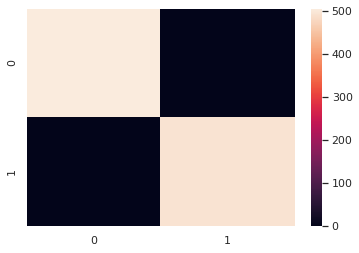




K value 7
 precision	|	                 1.0	|	                 1.0
    recall	|	                 1.0	|	                 1.0
    fscore	|	                 1.0	|	                 1.0
   support	|	                 505	|	                 495
Accuracy  1.0
Confusion Matrix


[[505   0]
 [  0 495]]


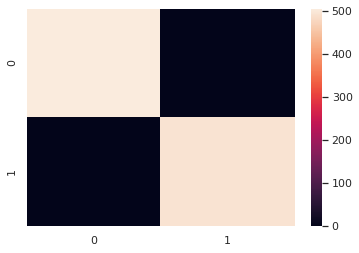

In [0]:
'''
differnt p values for eucledian and etc
'''
p_metrics = []
for p in [2,3,5]:
    knn_classifier = KNNClassifier()
    knn_classifier.train(train_path)
    predictions = knn_classifier.predict(test_path)
    test_labels = list()
    with open(test_labels_path) as f:
        for line in f:
            test_labels.append(line.strip())

    print('K value', k)
    from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
    precision, recall, fscore, support = score(test_labels, predictions)
    k_metrics.append(list([precision, recall, fscore, support]))
    print('precision'.rjust(10),*[str(i).rjust(20) for i in  list(precision)], sep='\t|\t')
    print('recall'.rjust(10),*[str(i).rjust(20) for i in  list(recall)], sep='\t|\t')
    print('fscore'.rjust(10),*[str(i).rjust(20) for i in  list(fscore)], sep='\t|\t')
    print('support'.rjust(10),*[str(i).rjust(20) for i in  list(support)], sep = '\t|\t')
    print('Accuracy ', accuracy_score(test_labels, predictions))

    print('Confusion Matrix\n\n')
    
    from sklearn.metrics import confusion_matrix
    from matplotlib import pyplot as plt
    %matplotlib inline
    print(confusion_matrix(test_labels, predictions))

    import seaborn as sns; sns.set()
    ax = sns.heatmap(confusion_matrix(test_labels, predictions))
    plt.show()
    print('\n\n')


In [0]:
df_test = pd.read_csv(test_path, header=None)
df_train = pd.read_csv(train_path, header=None)

train_shape = df_train.shape[:]
test_shape = df_test.shape[:]

# print(train_shape, test_shape)

df_train = df_train.replace('?', df_train[11].mode()[0])

df_train_y = df_train[0].values[:]
df_train = df_train.drop(0, axis =1 )
df_train = df_train.rename(columns=dict(zip(list(range(1,23)),list(range(0,22)))))

df_train = df_train.append(df_test, ignore_index=True)

categorical_ind = df_train.dtypes == 'object'


categorical_cols = df_train.columns[categorical_ind].tolist()

'''remove label variable'''

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train[categorical_cols] = df_train[categorical_cols].apply(lambda col: le.fit_transform(col))

df_train_x = df_train[categorical_cols].values[:train_shape[0]]
df_test_x = df_train[categorical_cols].values[train_shape[0]:]

del df_train


####Comparision with Sklearns KNN

sklearn KNN results at k = 7 and p = 2
 precision	|	                 1.0	|	                 1.0
    recall	|	                 1.0	|	                 1.0
    fscore	|	                 1.0	|	                 1.0
   support	|	                 505	|	                 495
skLearn KNN accuracy  1.0
Confusion Matrix


[[505   0]
 [  0 495]]


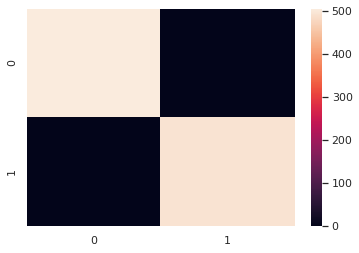

In [13]:
test_labels = list()
with open(test_labels_path) as f:
  for line in f:
    test_labels.append(line.strip())

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)


df_test = pd.read_csv(test_path, header=None)
knn.fit(df_train_x, df_train_y)

predictions = []

for i in df_test_x:
    i = i.reshape(1, -1)
    predictions.append(knn.predict(i))
predictions = np.array(predictions).reshape(1,-1)[0]

from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score

print('sklearn KNN results at k = 7 and p = 2')
precision, recall, fscore, support = score(test_labels, predictions)
print('precision'.rjust(10),*[str(i).rjust(20) for i in  list(precision)], sep='\t|\t')
print('recall'.rjust(10),*[str(i).rjust(20) for i in  list(recall)], sep='\t|\t')
print('fscore'.rjust(10),*[str(i).rjust(20) for i in  list(fscore)], sep='\t|\t')
print('support'.rjust(10),*[str(i).rjust(20) for i in  list(support)], sep = '\t|\t')

print('skLearn KNN accuracy ', accuracy_score(test_labels, predictions))
print('Confusion Matrix\n\n')
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline
print(confusion_matrix(test_labels, predictions))

import seaborn as sns; sns.set()
ax = sns.heatmap(confusion_matrix(test_labels, predictions))
plt.show()
print('\n\n')